In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [70]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
!pip install text_preprocessing
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation, remove_number

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 10.6 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Bangkok**

In [ ]:
#Load excel file
file_path = 'tripadvisor_reviews_bangkok.xlsx'
xls = pd.ExcelFile(file_path)

# Read and merge all sheets automatically
df_bangkok = pd.concat(
    [xls.parse(sheet_name).assign(SourceSheet=sheet_name) for sheet_name in xls.sheet_names],
    ignore_index=True)

#Remove duplicates
duplicates = df_bangkok[df_bangkok.duplicated()]
df_bangkok = df_bangkok.drop_duplicates()

df_bangkok

,rating,date,travel_type,title,text,location,SourceSheet
0,5,Jun 2025,NaN,Ayutthaya was absolutely beautiful. The ruins ...,Ayutthaya was absolutely beautiful. The ruins ...,6 contributions,Page_1_HISTORIC_CITY_OF_AYU
1,4,Apr 2025,NaN,I recommend taking a guided tour as we did.Oth...,I recommend taking a guided tour as we did.Oth...,"Gijon, Spain",Page_1_HISTORIC_CITY_OF_AYU
2,5,Jun 2025,Friends,Great day trip from Bangkok,Spent the day exploring Ayutthaya and really e...,"New York City, NY",Page_1_HISTORIC_CITY_OF_AYU
3,5,Jun 2025,Friends,Peaceful and full of history,Spent a few hours walking around Ayutthaya and...,"Saint Louis, MO",Page_1_HISTORIC_CITY_OF_AYU
4,4,May 2025,Couples,A must see historic site !,"Aytthaya is amazing ! Seriously hot, thought g...",5 contributions,Page_1_HISTORIC_CITY_OF_AYU
...,...,...,...,...,...,...,...
98417,5,Nov 2018,Friends,Great dat out,"What a great day out, our guide Mr T was very ...",United Kingdom,Page_55_2025_Half-Day_Railwa
98418,4,Oct 2018,Family,Great experience,A visit to the train market is a must for a ma...,"Truro, UK",Page_55_2025_Half-Day_Railwa
98419,5,Oct 2018,Friends,Very Enjoyable,My cousin and I did the Maeklong Train Market ...,9 contributions,Page_55_2025_Half-Day_Railwa
98420,5,Aug 2018,Couples,Amazing trip,"this trip was amazing, well worth the early mo...",Barton le clay Bedford,Page_55_2025_Half-Day_Railwa


In [ ]:
# Convert 'date' column to datetime objects, using mixed format to handle variations
df_bangkok['date'] = pd.to_datetime(df_bangkok['date'], format='mixed', errors='coerce')

# Filter rows from Jan 2023 onward, dropping rows where date conversion failed
df_bangkok = df_bangkok[df_bangkok['date'] >= pd.Timestamp('2023-01-01')].dropna(subset=['date'])
df_bangkok['date'] = df_bangkok['date'].dt.strftime('%Y-%m')

# Sort from newest to oldest
df_bangkok = df_bangkok.sort_values(by='date', ascending=False)

# Define the function to extract last part or return 'N/A'
df_bangkok['location'] = df_bangkok['location'].astype(str).apply(
    lambda x: x.split(',')[-1].strip() if ', ' in x else 'N/A'
)

#Drop unecessary columns
df_bangkok = df_bangkok.drop(columns=['SourceSheet', 'title', 'text'])
df_bangkok = df_bangkok.reset_index(drop=True)
df_bangkok

,rating,date,travel_type,location
0,5,2025-07,Couples,N/A
1,5,2025-07,Couples,N/A
2,5,2025-07,Friends,N/A
3,5,2025-07,Couples,N/A
4,5,2025-07,Solo,N/A
...,...,...,...,...
14509,5,2023-01,Solo,N/A
14510,4,2023-01,Couples,N/A
14511,3,2023-01,NaN,N/A
14512,5,2023-01,Family,N/A


**Pattaya**

In [ ]:
file_path = 'tripadvisor_reviews_pattaya.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Read and merge all sheets automatically
df_pattaya = pd.concat(
    [xls.parse(sheet_name).assign(SourceSheet=sheet_name) for sheet_name in xls.sheet_names],
    ignore_index=True
)

#Remove duplicates
duplicates = df_pattaya[df_pattaya.duplicated()]
df_pattaya = df_pattaya.drop_duplicates()
df_pattaya

,rating,date,travel_type,title,text,location,SourceSheet
0,5,Jul 2025,Couples,An amazing masterpiece,This place is an architectural masterpiece. Th...,144 contributions,Page_1_SANTUARY_OF_TRUTH
1,5,Jul 2025,Couples,An architectural wonder not to be missed,The Sanctuary DE Truth simply subjugated us. T...,"Paris, France",Page_1_SANTUARY_OF_TRUTH
2,5,Feb 2025,Family,"If Pattaya can only go to one attraction, it's...",This is not really a temple.\nIt's a giant woo...,"Kunming, China",Page_1_SANTUARY_OF_TRUTH
3,2,Jul 2025,Couples,Okay.,"Lots of hidden costs. Had to go with a guide, ...","Copenhagen, Denmark",Page_1_SANTUARY_OF_TRUTH
4,5,Jun 2025,Couples,Must see if in Pattaya,This Temple is one of the most breath take str...,"Balloch, UK",Page_1_SANTUARY_OF_TRUTH
...,...,...,...,...,...,...,...
25993,3,Jun 2012,Family,Far from Pattaya but must to visit,Budha's immage on a big mountain. They have de...,"Karachi, Pakistan",Page_42_BUDDHA_MOUNTAIN_-_KH
25994,4,Feb 2011,Friends,Worth a visit,Quite impressive with beautifully maintained g...,"London, UK",Page_42_BUDDHA_MOUNTAIN_-_KH
25995,3,May 2011,NaN,just as others say a good side trip from pattaya,"Were supposed to go to Buddha hill, but with t...","Quezon City, Quezon City, Philippines",Page_42_BUDDHA_MOUNTAIN_-_KH
25996,4,Dec 2010,NaN,A good day trip from Pattaya,"Beautiful gold budha inlaid into the mountain,...",bangkok,Page_42_BUDDHA_MOUNTAIN_-_KH


In [ ]:
# Convert 'date' column to datetime objects, using mixed format to handle variations
df_pattaya['date'] = pd.to_datetime(df_pattaya['date'], format='mixed', errors='coerce')

# Filter rows from Jan 2022 onward, dropping rows where date conversion failed
df_pattaya = df_pattaya[df_pattaya['date'] >= pd.Timestamp('2023-01-01')].dropna(subset=['date'])
df_pattaya['date'] = df_pattaya['date'].dt.strftime('%Y-%m')

# Sort from newest to oldest
df_pattaya = df_pattaya.sort_values(by='date', ascending=False)

# Define the function to extract last part or return 'N/A'
df_pattaya['location'] = df_pattaya['location'].astype(str).apply(
    lambda x: x.split(',')[-1].strip() if ', ' in x else 'N/A'
)

#Drop unecessary columns
df_pattaya = df_pattaya.drop(columns=['SourceSheet'])
df_pattaya = df_pattaya.reset_index(drop=True)
df_pattaya

,rating,date,travel_type,title,text,location
0,5,2025-08,Friends,Best massage of my existence,Absolutely fabulous massage. I received the si...,N/A
1,5,2025-08,Friends,Great place.,Gems gallery Pattaya is amazing place to be fo...,India
2,5,2025-08,Family,Do recommend!,The place was very beautiful and very organize...,N/A
3,5,2025-08,Friends,Life altering massage experience,I had an absolutely incredible experience with...,N/A
4,5,2025-08,Friends,Finally Relaxed and Rejuvenated,"My friends and I got massaged by Khun Apple, K...",N/A
...,...,...,...,...,...,...
2333,5,2023-01,Family,Great day out,Well run water park from start to finish. We w...,Australia
2334,5,2023-01,Friends,Awesome beach,"The beach goes on for ever - restaurants, bars...",Canada
2335,4,2023-01,Friends,Rainbow Beach 25 must go ..,"Look out for Rainbow beach 20/25 on Jomtien, i...",UK
2336,3,2023-01,NaN,Beautiful building - but do not come for the a...,The sanctuary was beautiful. Amazing a buildin...,Denmark


**Hanoi**

In [ ]:
file_path = 'tripadvisor_reviews_hanoi.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Read and merge all sheets automatically
df_hanoi = pd.concat(
    [xls.parse(sheet_name).assign(SourceSheet=sheet_name) for sheet_name in xls.sheet_names],
    ignore_index=True
)

#Remove duplicates
duplicates = df_hanoi[df_hanoi.duplicated()]
df_hanoi = df_hanoi.drop_duplicates()
df_hanoi

,rating,date,travel_type,title,text,location,SourceSheet
0,4.0,Jul 2025,Friends,Hà Nội,"We are really like here with good food, nice p...",2 contributions,Page_1_OLD_QUARTER_(2025)_A
1,5.0,May 2025,Solo,Great,Exploring the Old Quarter of Hanoi was one of ...,3 contributions,Page_1_OLD_QUARTER_(2025)_A
2,5.0,Jun 2023,Couples,Top Places to Visit in Hanoi,"The oldest commercial district in Hanoi, on th...","Longjing, Taichung",Page_1_OLD_QUARTER_(2025)_A
3,5.0,Jul 2025,Family,Must-see,First night in Vietnam.\nA joyful bazaar DE la...,"Vigneux-sur-Seine, France",Page_1_OLD_QUARTER_(2025)_A
4,5.0,Jun 2025,NaN,"The traditional architecture, with its narrow ...","The traditional architecture, with its narrow ...","Brisbane, Australia",Page_1_OLD_QUARTER_(2025)_A
...,...,...,...,...,...,...,...
80551,5.0,May 2025,Couples,Army jeep tour from old quarter of Government ...,We had an absolutely amazing day with our guid...,1 contribution,Page_76_HANOI_BACKSTREET_TOU
80552,5.0,May 2025,Couples,Best tour in Vietnam so far!,Fred and Mr Q were absolutely amazing today. I...,1 contribution,Page_76_HANOI_BACKSTREET_TOU
80553,5.0,NaN,NaN,Red river County side cultural tour.,"our tour guide Huy, was excellent. On this tou...",Indonesia,Page_76_HANOI_BACKSTREET_TOU
80554,5.0,May 2025,Solo,A must do in Hanoi,Hue our tour guide was exceptional with his kn...,"Fremantle, Australia",Page_76_HANOI_BACKSTREET_TOU


In [ ]:
# Convert 'date' column to datetime objects, using mixed format to handle variations
df_hanoi['date'] = pd.to_datetime(df_hanoi['date'], format='mixed', errors='coerce')

# Filter rows from Jan 2022 onward, dropping rows where date conversion failed
df_hanoi = df_hanoi[df_hanoi['date'] >= pd.Timestamp('2023-01-01')].dropna(subset=['date'])
df_hanoi['date'] = df_hanoi['date'].dt.strftime('%Y-%m')

# Sort from newest to oldest
df_hanoi = df_hanoi.sort_values(by='date', ascending=False)

# Define the function to extract last part or return 'N/A'
df_hanoi['location'] = df_hanoi['location'].astype(str).apply(
    lambda x: x.split(',')[-1].strip() if ', ' in x else 'N/A'
)

#Drop unecessary columns
df_hanoi = df_hanoi.drop(columns=['SourceSheet'])
df_hanoi = df_hanoi.reset_index(drop=True)
df_hanoi

,rating,date,travel_type,title,text,location
0,4.0,2025-07,Friends,Hà Nội,"We are really like here with good food, nice p...",N/A
1,5.0,2025-07,Couples,Great thing to do in Hanoi,What a great thing to do in Hanoi!\nBella was ...,Australia
2,5.0,2025-07,NaN,The teacher was bright and had a lot of fun. T...,The teacher was bright and had a lot of fun. T...,N/A
3,5.0,2025-07,Friends,Friendly and Happy Experience,"The class timing is just perfect, Vy is patien...",Singapore
4,5.0,2025-07,NaN,We had an absolutely amazing time at this cook...,We had an absolutely amazing time at this cook...,N/A
...,...,...,...,...,...,...
36095,5.0,2023-01,Couples,Fantastic couples massage!,Easily the best massage we had in Vietnam. Had...,UK
36096,5.0,2023-01,Family,Great Hanoi food,Our guide Hieu: an undergrad studying Tourism ...,Singapore
36097,5.0,2023-01,Couples,Really good afternoon,We had a really nice afternoon with Ngoc Linh ...,N/A
36098,5.0,2023-01,Solo,Best experience in Hanoi,My guide Thuy was amazing. I was the only one ...,N/A


**Danang**

In [ ]:
file_path = 'tripadvisor_reviews_danang.xlsx'

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Read and merge all sheets automatically
df_danang = pd.concat(
    [xls.parse(sheet_name).assign(SourceSheet=sheet_name) for sheet_name in xls.sheet_names],
    ignore_index=True
)

#Remove duplicates
duplicates = df_danang[df_danang.duplicated()]
df_danang = df_danang.drop_duplicates()
df_danang

,rating,date,travel_type,title,text,location,SourceSheet
0,4,Jul 2025,Couples,Da Nang view point,"Hidden caves, spiral staircases inside mountai...","Chicago, IL",Page_77_THE_MARBLE_MOUNTAINS
1,5,Jul 2025,Family,Is the Marble Mountains in Danang worth a visit?,"""Hmm, I think it's really worth checking out, ...","Da Nang, Vietnam",Page_77_THE_MARBLE_MOUNTAINS
2,3,Jul 2025,Family,"More than Marble Mountains, Mumble Mumble Moun...","So, the 3 dots are because in itself it would ...","Province of Turin, Italy",Page_77_THE_MARBLE_MOUNTAINS
3,4,Jul 2025,Couples,The Marble caves are a must if in the area of ...,It was a pleasant day getting away from the he...,"Ko Samui, Thailand",Page_77_THE_MARBLE_MOUNTAINS
4,4,Jul 2025,Couples,Well worth the trip! Very interesting,Lots of uphill walking so you have to be in fa...,8 contributions,Page_77_THE_MARBLE_MOUNTAINS
...,...,...,...,...,...,...,...
39986,5,Feb 2018,Couples,Fantastic service!,Myself and my boyfriend rented a Honda Lean fo...,3 contributions,Page_121_THE_MOTORBIKE_STATIO
39987,5,Dec 2017,Family,Excellent Service,Me. Le was very helpful and informative when a...,1 contribution,Page_121_THE_MOTORBIKE_STATIO
39988,5,Sept 2017,Solo,Rented a motorbike in Thanh Hoa,Mr Lee and Mr Phuong were very helpful. The mo...,3 contributions,Page_121_THE_MOTORBIKE_STATIO
39989,5,Aug 2017,Couples,Really helpful,The guys help us really well. We had to sell o...,"Ulm, Germany",Page_121_THE_MOTORBIKE_STATIO


In [ ]:
# Convert 'date' column to datetime objects, using mixed format to handle variations
df_danang['date'] = pd.to_datetime(df_danang['date'], format='mixed', errors='coerce')

# Filter rows from Jan 2022 onward, dropping rows where date conversion failed
df_danang = df_danang[df_danang['date'] >= pd.Timestamp('2023-01-01')].dropna(subset=['date'])
df_danang['date'] = df_danang['date'].dt.strftime('%Y-%m')

# Sort from newest to oldest
df_danang = df_danang.sort_values(by='date', ascending=False)

# Define the function to extract last part or return 'N/A'
df_danang['location'] = df_danang['location'].astype(str).apply(
    lambda x: x.split(',')[-1].strip() if ', ' in x else 'N/A'
)

#Drop unecessary columns
df_danang = df_danang.drop(columns=['SourceSheet'])
df_danang = df_danang.reset_index(drop=True)
df_danang

,rating,date,travel_type,title,text,location
0,5,2025-08,Solo,Excellent Experience,I went to A Donk Silk Tailors for a jacket. Ex...,N/A
1,5,2025-08,Solo,They really deliver!,Ba Ri Tailor delivered an outstanding experien...,CA
2,5,2025-08,Family,The clothes came up amazingly!! Super happy an...,This is the place everyone needs to come to fo...,N/A
3,5,2025-08,Family,Tailored clothing,I came to this shop recommended by and friend ...,N/A
4,5,2025-08,Couples,Relaxing experience,"We came without booking, and the réception gav...",N/A
...,...,...,...,...,...,...
13666,4,2023-01,Friends,App & Theatre Shows,Here’s what’s important:\n1. If raining bring ...,Australia
13667,4,2023-01,Solo,A Visit Worth the Effort,This is a step back in time when visiting the ...,Australia
13668,5,2023-01,Couples,Our Rehahn experience,We came across the gallery in HoChiMinh by cha...,N/A
13669,5,2023-01,Family,Subliming Vietnam through pictures,The Gallery and 5 minutes walking distance Mus...,N/A


**Save files**

In [ ]:
df_bangkok.to_csv('short_bangkok.csv', index=False)

In [ ]:
df_pattaya.to_csv('short_pattaya.csv', index=False)

In [ ]:
df_hanoi.to_csv('short_hanoi.csv', index=False)

In [ ]:
df_danang.to_csv('short_danang.csv', index=False)

**NLP Preprocessing**

In [ ]:
#NLP clean function

def normalize_text(text):
    preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation, remove_number]
    normalized_text = preprocess_text(text, preprocess_functions)
    return normalized_text

def tokenize_text(text):
    return word_tokenize(text)

def cleaning_stopwords(text):
    stopword_list = {}
    stop_words = set(stopwords.words('english')).union(stopword_list)
    return [word for word in text if word not in stop_words]

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text if word.isalnum()]

def stemming_on_text(text):
    st = PorterStemmer()
    return [st.stem(word) for word in text]

def clean_text(text):
    normalized_text = normalize_text(text)
    tokenized_text = tokenize_text(normalized_text)
    cleaned_stopwords_text = cleaning_stopwords(tokenized_text)
    # stemmed_text = stemming_on_text(cleaned_stopwords_text)
    lemmatized_text = lemmatize_text(cleaned_stopwords_text)
    return " ".join(lemmatized_text)

In [ ]:
fixed_rows = []
with open('short_bangkok.csv', 'r', encoding='utf-8', newline='') as infile:
    reader = csv.reader(infile, delimiter=',', quotechar='"', skipinitialspace=True)
    for row in reader:
        fixed_rows.append(row)

df_bangkok = pd.DataFrame(fixed_rows[1:], columns=fixed_rows[0])

In [ ]:
fixed_rows = []
with open('short_pattaya.csv', 'r', encoding='utf-8', newline='') as infile:
    reader = csv.reader(infile, delimiter=',', quotechar='"', skipinitialspace=True)
    for row in reader:
        fixed_rows.append(row)

df_pattaya = pd.DataFrame(fixed_rows[1:], columns=fixed_rows[0])

In [ ]:
fixed_rows = []
with open('short_hanoi.csv', 'r', encoding='utf-8', newline='') as infile:
    reader = csv.reader(infile, delimiter=',', quotechar='"', skipinitialspace=True)
    for row in reader:
        fixed_rows.append(row)

df_hanoi = pd.DataFrame(fixed_rows[1:], columns=fixed_rows[0])

In [ ]:
fixed_rows = []
with open('short_danang.csv', 'r', encoding='utf-8', newline='') as infile:
    reader = csv.reader(infile, delimiter=',', quotechar='"', skipinitialspace=True)
    for row in reader:
        fixed_rows.append(row)

df_danang = pd.DataFrame(fixed_rows[1:], columns=fixed_rows[0])

In [ ]:
df_bangkok['title'] = df_bangkok['title'].astype(str).str.replace(r'\s*\n\s*', ' ', regex=True).str.strip()
df_bangkok['text'] = df_bangkok['text'].astype(str).str.replace(r'\s*\n\s*', ' ', regex=True).str.strip()

df_bangkok['content'] = df_bangkok['title'] + ' ' + df_bangkok['text']
df_bangkok['processed_text'] = df_bangkok['content'].apply(clean_text)
df_bangkok

,rating,date,travel_type,title,text,location,content,processed_text
0,5,2025-07,Couples,Great tour,Anna was a great tour guide. Alot of fun. Saw ...,N/A,Great tour Anna was a great tour guide. Alot o...,great tour anna great tour guide alot fun saw ...
1,5,2025-07,Family,Boat tour,"Excellent excursion, very fun. Ken, our attent...",N/A,"Boat tour Excellent excursion, very fun. Ken, ...",boat tour excellent excursion fun ken attentiv...
2,5,2025-07,Family,Thon buri canal trip,Great insight into Thon Buri canal life. The g...,N/A,Thon buri canal trip Great insight into Thon B...,thon buri canal trip great insight thon buri c...
3,5,2025-07,Friends,Great Tour,"Great guide, showed us lots of interesting thi...",N/A,"Great Tour Great guide, showed us lots of inte...",great tour great guide showed u lot interestin...
4,5,2025-07,Solo,Must do.,It was a great experience. I would definitely ...,N/A,Must do. It was a great experience. I would de...,must great experience would definitely guide f...
...,...,...,...,...,...,...,...,...
14509,4,2023-01,Couples,High end shopping!,This Mall was opposite the hotel we were stayi...,France,High end shopping! This Mall was opposite the ...,high end shopping mall opposite hotel staying ...
14510,5,2023-01,Couples,Overwhelmingly good,The mall is an architectural wonder with a foo...,N/A,Overwhelmingly good The mall is an architectur...,overwhelmingly good mall architectural wonder ...
14511,5,2023-01,,Worth Visiting,We took the green flag boat from Wat Arun Pier...,Singapore,Worth Visiting We took the green flag boat fro...,worth visiting took green flag boat wat arun p...
14512,5,2023-01,Family,Huge shopping mall,Huge shopping mall with lots of food options. ...,China,Huge shopping mall Huge shopping mall with lot...,huge shopping mall huge shopping mall lot food...


In [ ]:
clean_bangkok = df_bangkok.drop(columns=['title', 'text']).to_csv('clean_bangkok.csv', index=False)

In [ ]:
df_pattaya['title'] = df_pattaya['title'].astype(str).str.replace(r'\s*\n\s*', ' ', regex=True).str.strip()
df_pattaya['text'] = df_pattaya['text'].astype(str).str.replace(r'\s*\n\s*', ' ', regex=True).str.strip()

df_pattaya['content'] = df_pattaya['title'] + ' ' + df_pattaya['text']
df_pattaya['processed_text'] = df_pattaya['content'].apply(clean_text)
df_pattaya

,rating,date,travel_type,title,text,location,content,processed_text
0,5,2025-08,Friends,Best massage of my existence,Absolutely fabulous massage. I received the si...,N/A,Best massage of my existence Absolutely fabulo...,best massage existence absolutely fabulous mas...
1,5,2025-08,Friends,Great place.,Gems gallery Pattaya is amazing place to be fo...,India,Great place. Gems gallery Pattaya is amazing p...,great place gem gallery pattaya amazing place ...
2,5,2025-08,Family,Do recommend!,The place was very beautiful and very organize...,N/A,Do recommend! The place was very beautiful and...,recommend place beautiful organized people wor...
3,5,2025-08,Friends,Life altering massage experience,I had an absolutely incredible experience with...,N/A,Life altering massage experience I had an abso...,life altering massage experience absolutely in...
4,5,2025-08,Friends,Finally Relaxed and Rejuvenated,"My friends and I got massaged by Khun Apple, K...",N/A,Finally Relaxed and Rejuvenated My friends and...,finally relaxed rejuvenated friend got massage...
...,...,...,...,...,...,...,...,...
2333,5,2023-01,Family,Great day out,Well run water park from start to finish. We w...,Australia,Great day out Well run water park from start t...,great day well run water park start finish wen...
2334,5,2023-01,Friends,Awesome beach,"The beach goes on for ever - restaurants, bars...",Canada,Awesome beach The beach goes on for ever - res...,awesome beach beach go ever restaurant bar lun...
2335,4,2023-01,Friends,Rainbow Beach 25 must go ..,"Look out for Rainbow beach 20/25 on Jomtien, i...",UK,Rainbow Beach 25 must go .. Look out for Rainb...,rainbow beach must go look rainbow beach jomti...
2336,3,2023-01,,Beautiful building - but do not come for the a...,The sanctuary was beautiful. Amazing a buildin...,Denmark,Beautiful building - but do not come for the a...,beautiful building come animal rowing boat san...


In [ ]:
clean_pattaya = df_pattaya.drop(columns=['title', 'text']).to_csv('clean_pattaya.csv', index=False)

In [ ]:
df_hanoi['title'] = df_hanoi['title'].astype(str).str.replace(r'\s*\n\s*', ' ', regex=True).str.strip()
df_hanoi['text'] = df_hanoi['text'].astype(str).str.replace(r'\s*\n\s*', ' ', regex=True).str.strip()

df_hanoi['content'] = df_hanoi['title'] + ' ' + df_hanoi['text']
df_hanoi['processed_text'] = df_hanoi['content'].apply(clean_text)
df_hanoi

,rating,date,travel_type,title,text,location,content,processed_text
0,4.0,2025-07,Friends,Hà Nội,"We are really like here with good food, nice p...",N/A,"Hà Nội We are really like here with good food,...",hà nội really like good food nice people frien...
1,5.0,2025-07,Couples,Great thing to do in Hanoi,What a great thing to do in Hanoi! Bella was s...,Australia,Great thing to do in Hanoi What a great thing ...,great thing hanoi great thing hanoi bella grea...
2,5.0,2025-07,,The teacher was bright and had a lot of fun. T...,The teacher was bright and had a lot of fun. T...,N/A,The teacher was bright and had a lot of fun. T...,teacher bright lot fun food together meal grea...
3,5.0,2025-07,Friends,Friendly and Happy Experience,"The class timing is just perfect, Vy is patien...",Singapore,Friendly and Happy Experience The class timing...,friendly happy experience class timing perfect...
4,5.0,2025-07,,We had an absolutely amazing time at this cook...,We had an absolutely amazing time at this cook...,N/A,We had an absolutely amazing time at this cook...,absolutely amazing time cooking class sunny in...
...,...,...,...,...,...,...,...,...
36095,5.0,2023-01,Couples,Fantastic couples massage!,Easily the best massage we had in Vietnam. Had...,UK,Fantastic couples massage! Easily the best mas...,fantastic couple massage easily best massage v...
36096,5.0,2023-01,Family,Great Hanoi food,Our guide Hieu: an undergrad studying Tourism ...,Singapore,Great Hanoi food Our guide Hieu: an undergrad ...,great hanoi food guide hieu undergrad studying...
36097,5.0,2023-01,Couples,Really good afternoon,We had a really nice afternoon with Ngoc Linh ...,N/A,Really good afternoon We had a really nice aft...,really good afternoon really nice afternoon ng...
36098,5.0,2023-01,Solo,Best experience in Hanoi,My guide Thuy was amazing. I was the only one ...,N/A,Best experience in Hanoi My guide Thuy was ama...,best experience hanoi guide thuy amazing one t...


In [ ]:
clean_hanoi = df_hanoi.drop(columns=['title', 'text']).to_csv('clean_hanoi.csv', index=False)

In [ ]:
df_danang['title'] = df_danang['title'].astype(str).str.replace(r'\s*\n\s*', ' ', regex=True).str.strip()
df_danang['text'] = df_danang['text'].astype(str).str.replace(r'\s*\n\s*', ' ', regex=True).str.strip()

df_danang['content'] = df_danang['title'] + ' ' + df_danang['text']
df_danang['processed_text'] = df_danang['content'].apply(clean_text)
df_danang

,rating,date,travel_type,title,text,location,content,processed_text
0,5,2025-08,Solo,Excellent Experience,I went to A Donk Silk Tailors for a jacket. Ex...,N/A,Excellent Experience I went to A Donk Silk Tai...,excellent experience went donk silk tailor jac...
1,5,2025-08,Solo,They really deliver!,Ba Ri Tailor delivered an outstanding experien...,CA,They really deliver! Ba Ri Tailor delivered an...,really deliver ba ri tailor delivered outstand...
2,5,2025-08,Family,The clothes came up amazingly!! Super happy an...,This is the place everyone needs to come to fo...,N/A,The clothes came up amazingly!! Super happy an...,clothes came amazingly super happy staff super...
3,5,2025-08,Family,Tailored clothing,I came to this shop recommended by and friend ...,N/A,Tailored clothing I came to this shop recommen...,tailored clothing came shop recommended friend...
4,5,2025-08,Couples,Relaxing experience,"We came without booking, and the réception gav...",N/A,"Relaxing experience We came without booking, a...",relaxing experience came without booking récep...
...,...,...,...,...,...,...,...,...
13666,4,2023-01,Friends,App & Theatre Shows,Here’s what’s important: 1. If raining bring a...,Australia,App & Theatre Shows Here’s what’s important: 1...,app theatre show important raining bring umbre...
13667,4,2023-01,Solo,A Visit Worth the Effort,This is a step back in time when visiting the ...,Australia,A Visit Worth the Effort This is a step back i...,visit worth effort step back time visiting imp...
13668,5,2023-01,Couples,Our Rehahn experience,We came across the gallery in HoChiMinh by cha...,N/A,Our Rehahn experience We came across the galle...,rehahn experience came across gallery hochimin...
13669,5,2023-01,Family,Subliming Vietnam through pictures,The Gallery and 5 minutes walking distance Mus...,N/A,Subliming Vietnam through pictures The Gallery...,subliming vietnam picture gallery minute walki...


In [ ]:
clean_danang = df_danang.drop(columns=['title', 'text']).to_csv('clean_danang.csv', index=False)

**Descriptive**

In [3]:
df_sentiment_hanoi = pd.read_csv('hanoi_sentiment.csv')
df_sentiment_danang = pd.read_csv('danang_sentiment.csv')

df_sentiment_vn = pd.concat([df_sentiment_hanoi, df_sentiment_danang], ignore_index=True)
df_sentiment_vn

,processed_text,score_RoBERTa,intensity_RoBERTa,resultRoBERTa,rating,date,travel_type,location
0,hà nội really like good food nice people frien...,[0.01699371 0.08790884 0.89509743],0.878,Positive,4.0,2025-07,Friends,NaN
1,passion plate thanks evelyn big thanks evelyn ...,[0.00149713 0.01079737 0.98770547],0.986,Positive,5.0,2025-07,Friends,NaN
2,excellent food tour best hidden dish excellent...,[0.00196928 0.01133113 0.9866996 ],0.985,Positive,5.0,2025-07,Friends,NaN
3,best food tour patrick back great authentic fo...,[0.0015648 0.01372731 0.98470783],0.983,Positive,5.0,2025-07,Friends,NaN
4,great street food tour max great delicious str...,[0.00159184 0.00996857 0.98843956],0.987,Positive,5.0,2025-07,Family,Israel
...,...,...,...,...,...,...,...,...
47083,app theatre show important raining bring umbre...,[0.07968553 0.79999715 0.12031735],0.041,Neutral,4.0,2023-01,Friends,Australia
47084,visit worth effort step back time visiting imp...,[0.00912691 0.18701436 0.8038587 ],0.795,Positive,4.0,2023-01,Solo,Australia
47085,rehahn experience came across gallery hochimin...,[0.00176639 0.02259012 0.97564346],0.974,Positive,5.0,2023-01,Couples,NaN
47086,subliming vietnam picture gallery minute walki...,[0.01031484 0.15958993 0.83009523],0.820,Positive,5.0,2023-01,Family,NaN


In [2]:
df_sentiment_bangkok = pd.read_csv('bangkok_sentiment.csv')
df_sentiment_pattaya = pd.read_csv('pattaya_sentiment.csv')

df_sentiment_tl = pd.concat([df_sentiment_bangkok, df_sentiment_pattaya], ignore_index=True)
df_sentiment_tl

,processed_text,score_RoBERTa,intensity_RoBERTa,resultRoBERTa,rating,date,travel_type,location
0,great tour anna great tour guide alot fun saw ...,[0.00182574 0.0134236 0.9847506 ],0.983,Positive,5,2025-07,Couples,NaN
1,boat tour excellent excursion fun ken attentiv...,[0.00201899 0.02288288 0.9750981 ],0.973,Positive,5,2025-07,Family,NaN
2,thon buri canal trip great insight thon buri c...,[0.00273481 0.0419921 0.95527303],0.953,Positive,5,2025-07,Family,NaN
3,great tour great guide showed u lot interestin...,[0.00292292 0.02523496 0.9718421 ],0.969,Positive,5,2025-07,Friends,NaN
4,must great experience would definitely guide f...,[0.00281898 0.02788064 0.96930045],0.966,Positive,5,2025-07,Solo,NaN
...,...,...,...,...,...,...,...,...
17196,great day well run water park start finish wen...,[0.00242676 0.01431447 0.9832587 ],0.981,Positive,5,2023-01,Family,Australia
17197,awesome beach beach go ever restaurant bar lun...,[0.00277176 0.13596162 0.8612667 ],0.858,Positive,5,2023-01,Friends,Canada
17198,rainbow beach must go look rainbow beach jomti...,[0.00266137 0.03125554 0.9660831 ],0.963,Positive,4,2023-01,Friends,UK
17199,beautiful building come animal rowing boat san...,[0.00985712 0.12159052 0.8685523 ],0.859,Positive,3,2023-01,NaN,Denmark


In [4]:
df_vn = pd.concat([df_sentiment_hanoi, df_sentiment_danang], ignore_index=True)

In [5]:
df_tl = pd.concat([df_sentiment_bangkok, df_sentiment_pattaya], ignore_index=True)

**Ratings**

In [6]:
counts_rating_vn = df_vn['rating'].value_counts()
counts_rating_vn

,count
rating,
5.0,43119
4.0,2491
3.0,765
1.0,391
2.0,322


In [ ]:
total_reviews_vn = counts_rating_vn.sum()
five_star_reviews_vn = counts_rating_vn.get(5.0, 0) # Use .get() to handle cases where 5.0 might not exist
proportion_five_star_vn = five_star_reviews_vn / total_reviews_vn if total_reviews_vn > 0 else 0

# Calculate the total of other ratings
other_ratings_vn = total_reviews_vn - five_star_reviews_vn

print(f"Total reviews (Vietnam): {total_reviews_vn}")
print(f"5-star reviews (Vietnam): {five_star_reviews_vn}")
print(f"Proportion of 5-star reviews (Vietnam): {proportion_five_star_vn:.2f}")
print(f"Total of other ratings (Vietnam): {other_ratings_vn}")

Total reviews (Vietnam): 47088
5-star reviews (Vietnam): 43119
Proportion of 5-star reviews (Vietnam): 0.92
Total of other ratings (Vietnam): 3969


In [ ]:
counts_sentiment_vn = df_sentiment_vn['resultRoBERTa'].value_counts()
counts_sentiment_vn

,count
resultRoBERTa,
Positive,44933
Neutral,1545
Negative,610


In [7]:
counts_rating_tl = df_tl['rating'].value_counts()
counts_rating_tl

,count
rating,
5,12928
4,2366
3,856
1,631
2,420


In [ ]:
total_reviews_tl = counts_rating_tl.sum()
five_star_reviews_tl = counts_rating_tl.get(5, 0) # Use .get() to handle cases where 5 might not exist
proportion_five_star_tl = five_star_reviews_tl / total_reviews_tl if total_reviews_tl > 0 else 0

# Calculate the total of other ratings
other_ratings_tl = total_reviews_tl - five_star_reviews_tl

print(f"Total reviews (Thailand): {total_reviews_tl}")
print(f"5-star reviews (Thailand): {five_star_reviews_tl}")
print(f"Proportion of 5-star reviews (Thailand): {proportion_five_star_tl:.2f}")
print(f"Total of other ratings (Thailand): {other_ratings_tl}")

Total reviews (Thailand): 17201
5-star reviews (Thailand): 12928
Proportion of 5-star reviews (Thailand): 0.75
Total of other ratings (Thailand): 4273


In [ ]:
counts_sentiment_tl = df_sentiment_tl['resultRoBERTa'].value_counts()
counts_sentiment_tl

,count
resultRoBERTa,
Positive,14996
Neutral,1399
Negative,806


**Location**

In [ ]:
df_vn = df_vn[df_vn['location'] != 'N/A']

counts_vn = df_vn['location'].value_counts()
percent_vn = df_vn['location'].value_counts(normalize=True) * 100

# Combine into a DataFrame
df_vn_summary = pd.DataFrame({
    'location': counts_vn.index,
    'count': counts_vn.values,
    'percentage': percent_vn.values
})

df_vn_summary.head(20)

,location,count,percentage
0,Australia,1841,14.765800
1,UK,1681,13.482515
2,Vietnam,635,5.093038
3,India,546,4.379211
4,France,506,4.058389
5,Singapore,475,3.809753
6,Canada,431,3.456850
7,Germany,414,3.320500
8,CA,387,3.103946
9,Italy,376,3.015720


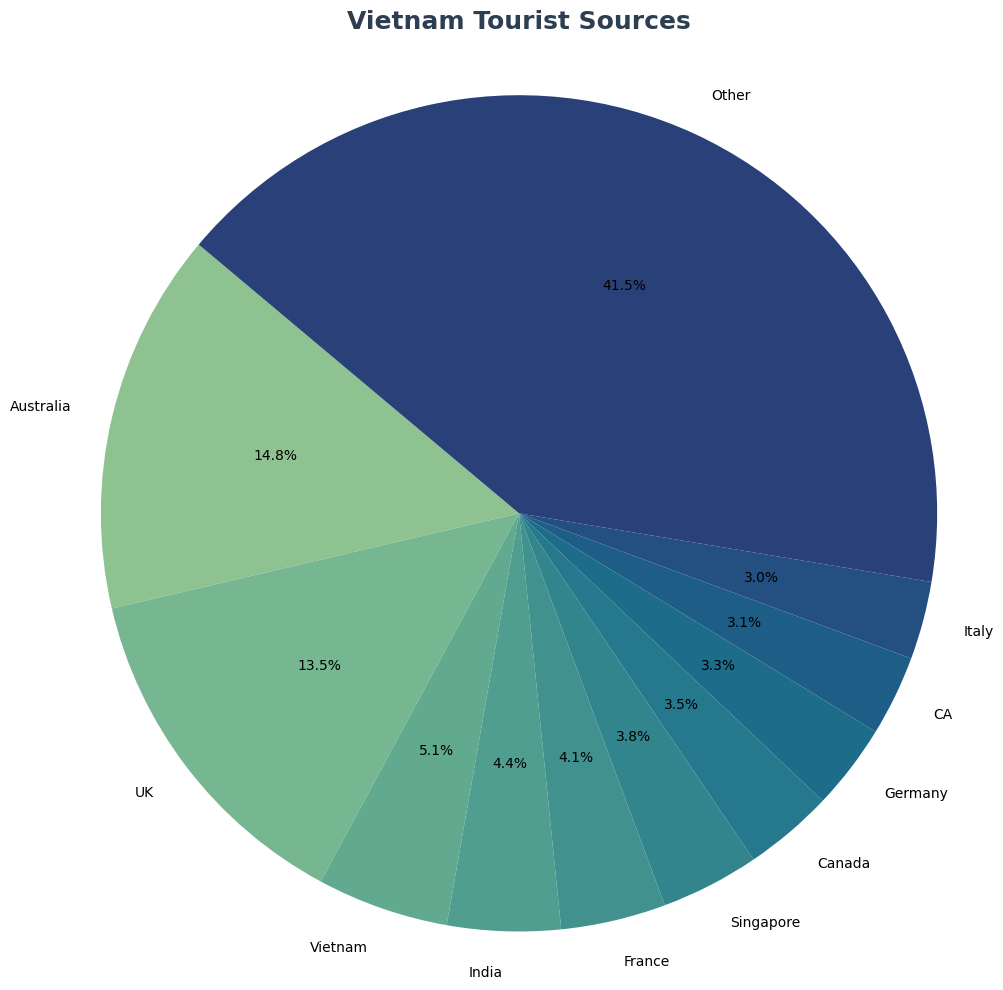

In [ ]:
# Separate top 10 and group the rest as 'Other'
top_10 = counts_vn.head(10)
other_total = counts_vn.iloc[10:].sum()

# Combine into one Series
combined_counts_vn = pd.concat([top_10, pd.Series({'Other': other_total})])

# Generate a green-blue gradient color list
#cmap = plt.cm.BuGn  # plt.cm.cubehelix or plt.cm.viridis
#colors = [cmap(i / len(combined_counts_vn)) for i in range(len(combined_counts_vn))]
colors_vn = sns.color_palette("crest", len(combined_counts_vn))

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(combined_counts_vn,
        labels=combined_counts_vn.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors_vn)
plt.title('Vietnam Tourist Sources',
          fontsize=18,
          fontweight='semibold',
          color='#2c3e50',
          pad=20)
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.savefig('VN_tourist_sources.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_tl = df_tl[df_tl['location'] != 'N/A']

counts_tl = df_tl['location'].value_counts()
percent_tl = df_tl['location'].value_counts(normalize=True) * 100

# Combine into a DataFrame
df_tl_summary = pd.DataFrame({
    'location': counts_tl.index,
    'count': counts_tl.values,
    'percentage': percent_tl.values
})

df_tl_summary.head(20)

,location,count,percentage
0,UK,1245,15.967680
1,Australia,576,7.387457
2,Thailand,490,6.284468
3,Italy,302,3.873285
4,Germany,299,3.834808
5,France,279,3.578299
6,India,262,3.360267
7,Singapore,261,3.347441
8,CA,253,3.244838
9,Canada,253,3.244838


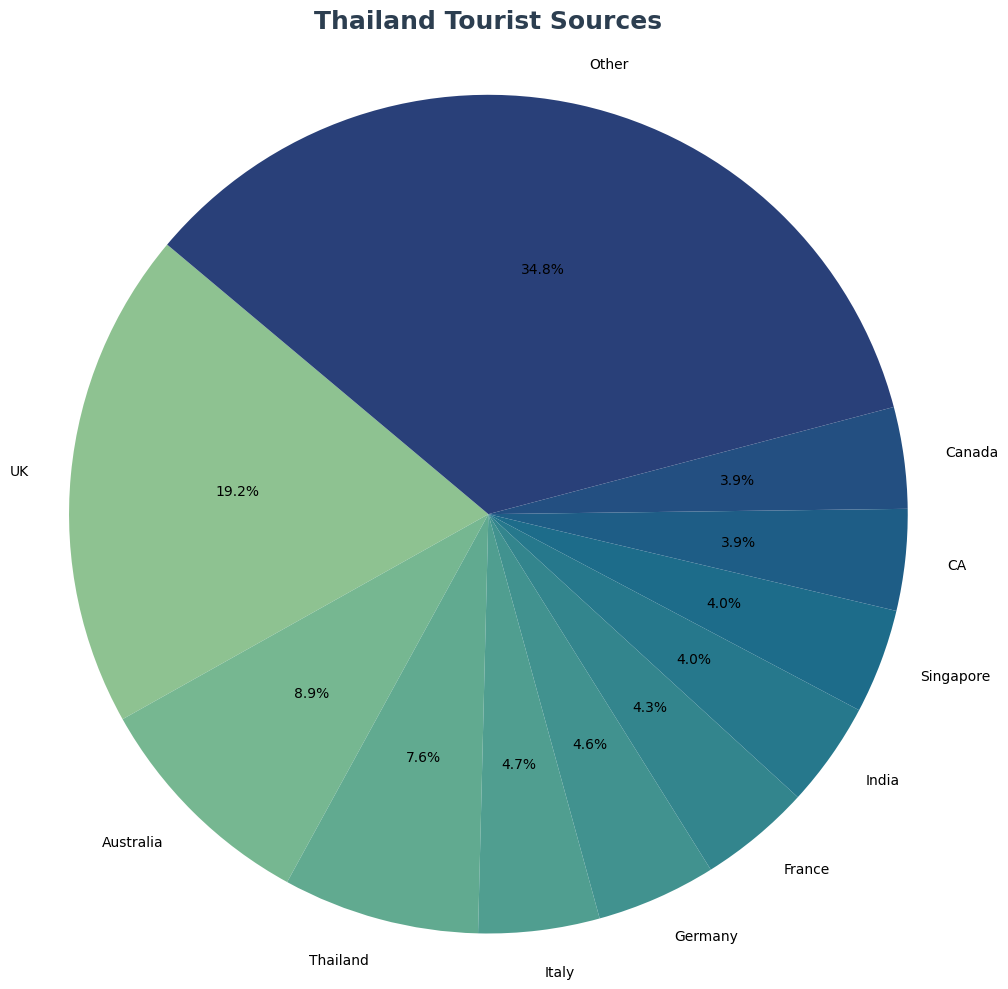

In [ ]:
# Separate top 10 and group the rest as 'Other'
top_10 = counts_tl.head(10)
other_total = counts_tl.iloc[20:].sum()

# Combine into one Series
combined_counts_tl = pd.concat([top_10, pd.Series({'Other': other_total})])

# Generate Thailand colors
# cmap_th = plt.cm.PuBuGn  #PuBu  # Or try PuBuGn for more greenish tones
# colors_tl = [cmap_th(i / len(combined_counts_tl)) for i in range(len(combined_counts_tl))]
colors_tl = sns.color_palette("crest", len(combined_counts_tl))

# Plot Thailand pie chart
plt.figure(figsize=(10, 10))
plt.pie(combined_counts_tl,
        labels=combined_counts_tl.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors_tl)
plt.title('Thailand Tourist Sources',
          fontsize=18,
          fontweight='semibold',
          color='#2c3e50',
          pad=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig('TL_tourist_sources.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
travel_type_vn = df_vn['travel_type'].dropna()

counts_travel_vn = travel_type_vn.value_counts()
percent_travel_vn = travel_type_vn.value_counts(normalize=True) * 100

# Combine into a DataFrame
travel_summary_vn = pd.DataFrame({
    'travel type': counts_travel_vn.index,
    'count': counts_travel_vn.values,
    'percentage': percent_travel_vn.values
})

travel_summary_vn

,travel type,count,percentage
0,Couples,16128,34.987092
1,Friends,11658,25.290149
2,Family,9949,21.582749
3,Solo,7848,17.024969
4,Business,514,1.115040


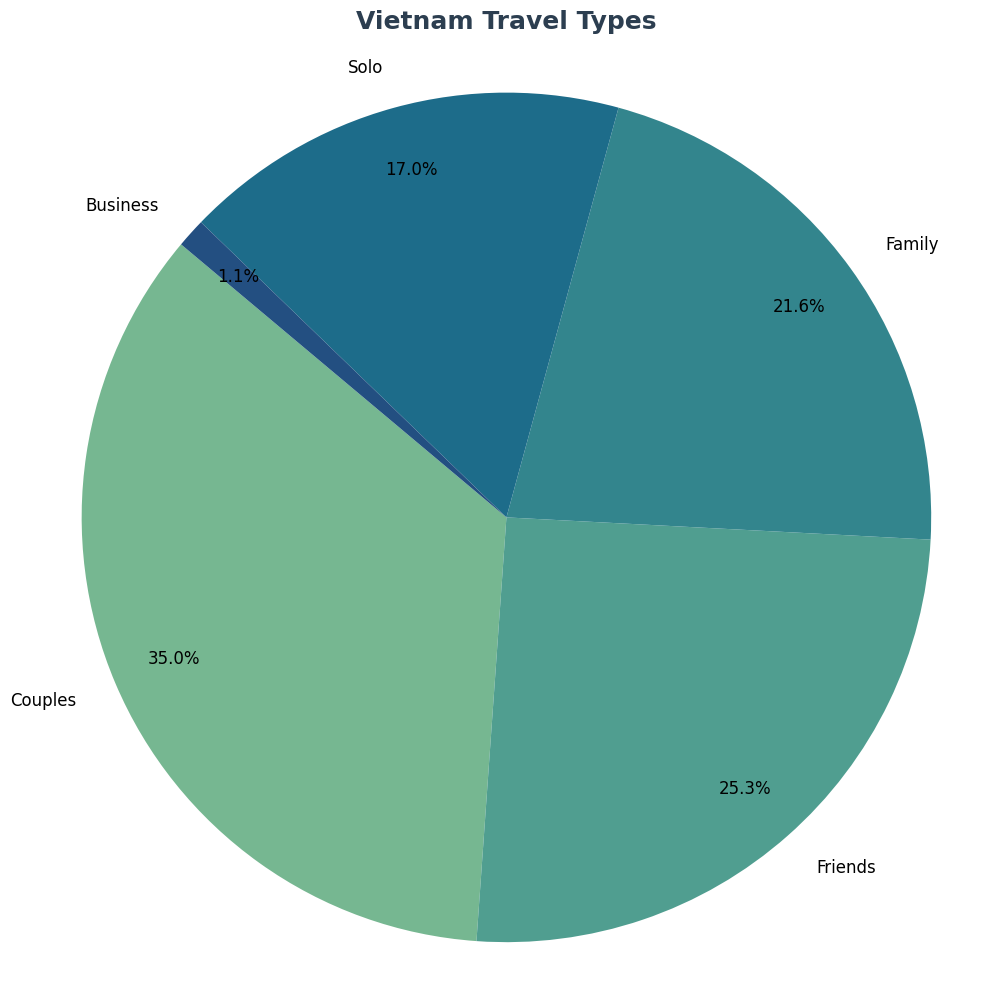

In [ ]:
# Generate mako color palette
colors_crest = sns.color_palette("crest", len(counts_travel_vn))

# Plot pie chart with mako colors
plt.figure(figsize=(10, 10))
plt.pie(counts_travel_vn,
        labels=counts_travel_vn.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors_crest,
        pctdistance=0.85,
        textprops={'fontsize': 12})
plt.title('Vietnam Travel Types',
          fontsize=18,
          fontweight='semibold',
          color='#2c3e50',
          pad=20)
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.savefig('VN_Traveltypes.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
travel_type_tl = df_tl['travel_type'].dropna()

counts_travel_tl = travel_type_tl.value_counts()
percent_travel_tl = travel_type_tl.value_counts(normalize=True) * 100

# Combine into a DataFrame
travel_summary_tl = pd.DataFrame({
    'travel type': counts_travel_tl.index,
    'count': counts_travel_tl.values,
    'percentage': percent_travel_tl.values
})

travel_summary_tl

,travel type,count,percentage
0,Couples,5831,35.535377
1,Family,4299,26.199037
2,Friends,3215,19.592906
3,Solo,2835,17.277104
4,Business,229,1.395576


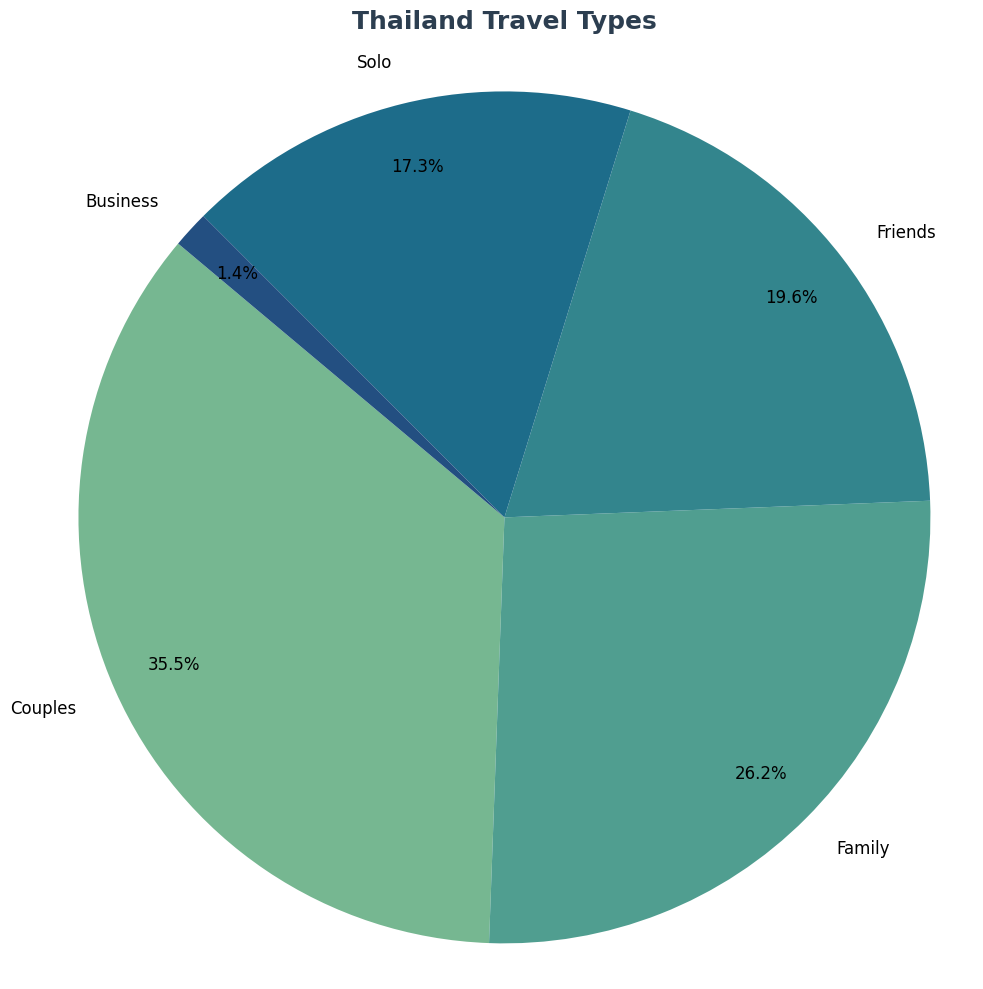

In [ ]:
# Generate mako color palette
colors_crest = sns.color_palette("crest", len(counts_travel_tl))

# Plot pie chart with mako colors
plt.figure(figsize=(10, 10))
plt.pie(counts_travel_tl,
        labels=counts_travel_tl.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors_crest,
        pctdistance=0.85,
        textprops={'fontsize': 12})
plt.title('Thailand Travel Types',
          fontsize=18,
          fontweight='semibold',
          color='#2c3e50',
          pad=20)
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.savefig('TL_Traveltypes.jpg', dpi=300, bbox_inches='tight')
plt.show()

**Sentiment Charts**

**VN**

In [ ]:
df_hanoi_sen = pd.read_csv('hanoi_sentiment.csv')
df_danang_sen = pd.read_csv('danang_sentiment.csv')

df_vn_sen = pd.concat([df_hanoi_sen, df_danang_sen], ignore_index=True)

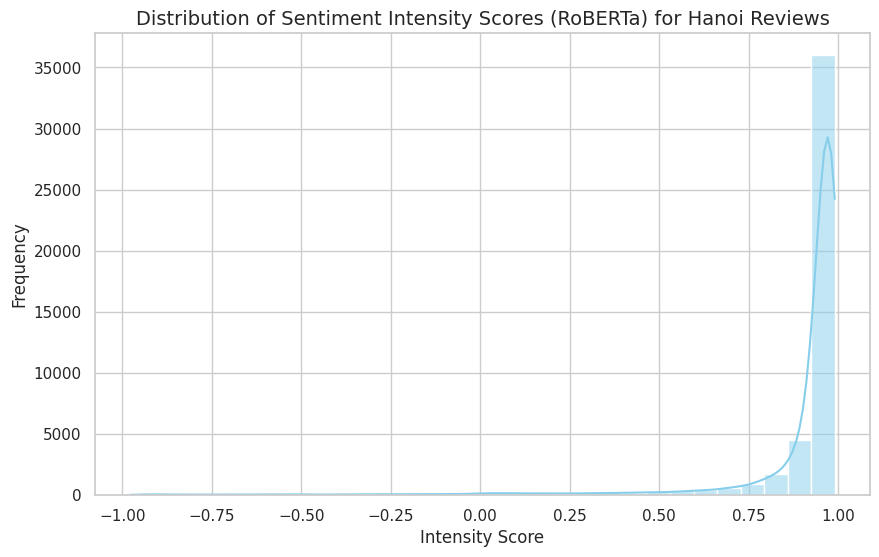

In [ ]:
# Set style
sns.set(style="whitegrid")

# Plot histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_vn_sen['intensity_RoBERTa'], kde=True, color='skyblue', bins=30)

# Labels and title
plt.title('Distribution of Sentiment Intensity Scores (RoBERTa) for Hanoi Reviews', fontsize=14)
plt.xlabel('Intensity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()

**TL**

In [ ]:
df_bangkok_sen = pd.read_csv('bangkok_sentiment.csv')
df_pattaya_sen = pd.read_csv('pattaya_sentiment.csv')

df_tl_sen = pd.concat([df_bangkok_sen, df_pattaya_sen], ignore_index=True)

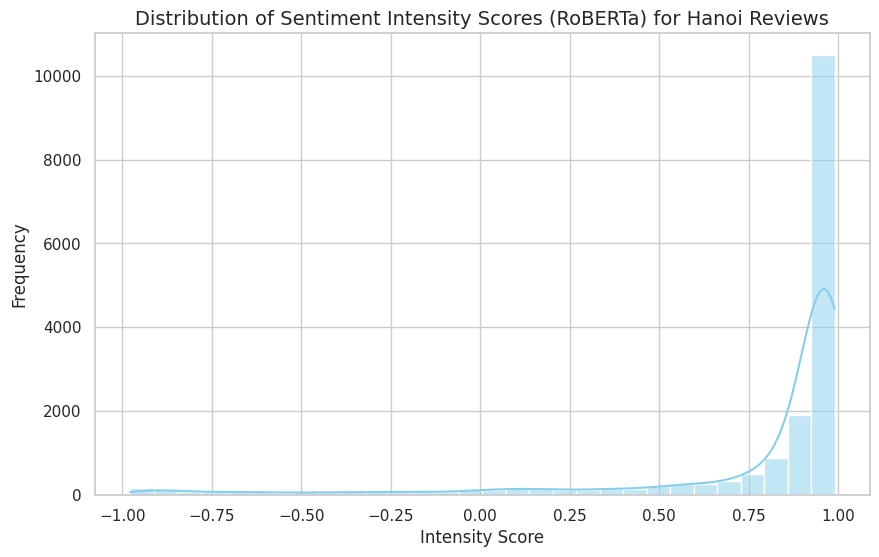

In [ ]:
# Set style
sns.set(style="whitegrid")

# Plot histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(df_tl_sen['intensity_RoBERTa'], kde=True, color='skyblue', bins=30)

# Labels and title
plt.title('Distribution of Sentiment Intensity Scores (RoBERTa) for Hanoi Reviews', fontsize=14)
plt.xlabel('Intensity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()

VN columns: Index(['processed_text', 'score_RoBERTa', 'intensity_RoBERTa', 'resultRoBERTa',
       'rating', 'date', 'travel_type', 'location', 'Location'],
      dtype='object')
TL columns: Index(['processed_text', 'score_RoBERTa', 'intensity_RoBERTa', 'resultRoBERTa',
       'rating', 'date', 'travel_type', 'location', 'Location'],
      dtype='object')


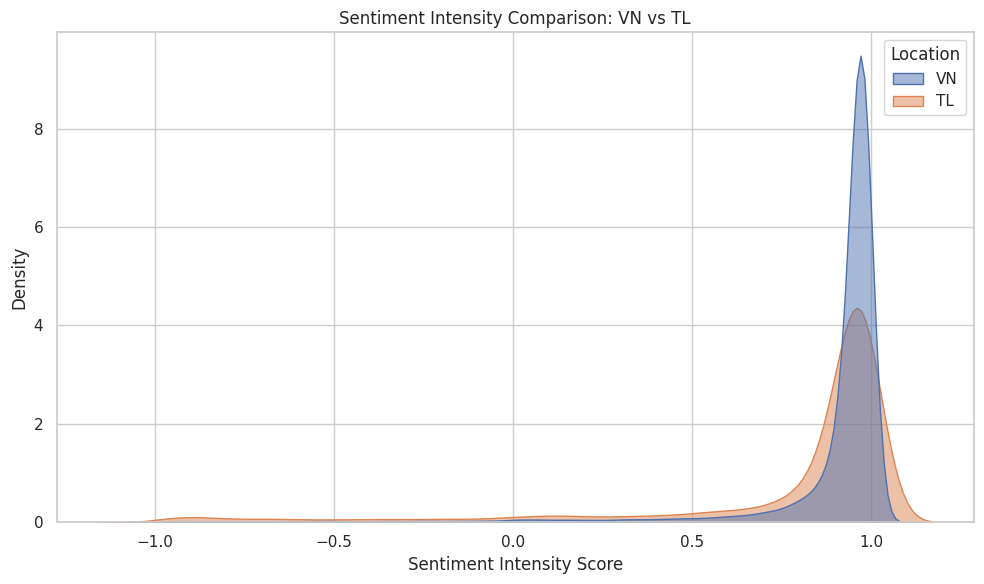

In [ ]:
# Check the column names to confirm the sentiment intensity column
print("VN columns:", df_vn_sen.columns)
print("TL columns:", df_tl_sen.columns)

# Replace 'intensity_RoBERTa' with the actual column name
vn_scores = df_vn_sen['intensity_RoBERTa']
tl_scores = df_tl_sen['intensity_RoBERTa']

# Combine into a single DataFrame for plotting
combined_df = pd.DataFrame({
    'Sentiment Intensity': pd.concat([vn_scores, tl_scores], ignore_index=True),
    'Location': ['VN'] * len(vn_scores) + ['TL'] * len(tl_scores)
})

# Plot KDE comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df, x='Sentiment Intensity', hue='Location', fill=True, common_norm=False, alpha=0.5)
plt.title('Sentiment Intensity Comparison: VN vs TL')
plt.xlabel('Sentiment Intensity Score')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.savefig('intensity_score.jpg', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
df_vn_sen['Location'] = 'VN'
df_tl_sen['Location'] = 'TL'
df_combined_sen = pd.concat([df_vn_sen, df_tl_sen], ignore_index=True)
df_combined_sen['date'] = pd.to_datetime(df_combined_sen['date'])

In [ ]:
# Filter data up to the end of July 2025
df_filtered_sen = df_combined_sen[df_combined_sen['date'] <= '2025-07-31'].copy()

df_sentiment_counts = df_filtered_sen.groupby(['date', 'Location', 'resultRoBERTa']).size().reset_index(name='review_count')
df_sentiment_pivot = df_sentiment_counts.pivot_table(index=['date', 'Location'], columns='resultRoBERTa', values='review_count', fill_value=0).reset_index()
df_sentiment_pivot.columns.name = None # remove column name

# Calculate total reviews for each date and location
df_sentiment_pivot['Total Reviews'] = df_sentiment_pivot[['Negative', 'Neutral', 'Positive']].sum(axis=1)

display(df_sentiment_pivot)

,date,Location,Negative,Neutral,Positive,Total Reviews
0,2023-01-01,TL,27.0,51.0,354.0,432.0
1,2023-01-01,VN,10.0,38.0,495.0,543.0
2,2023-02-01,TL,28.0,46.0,356.0,430.0
3,2023-02-01,VN,14.0,42.0,665.0,721.0
4,2023-03-01,TL,22.0,41.0,304.0,367.0
...,...,...,...,...,...,...
57,2025-05-01,VN,12.0,40.0,2561.0,2613.0
58,2025-06-01,TL,12.0,19.0,479.0,510.0
59,2025-06-01,VN,9.0,32.0,2156.0,2197.0
60,2025-07-01,TL,9.0,36.0,627.0,672.0


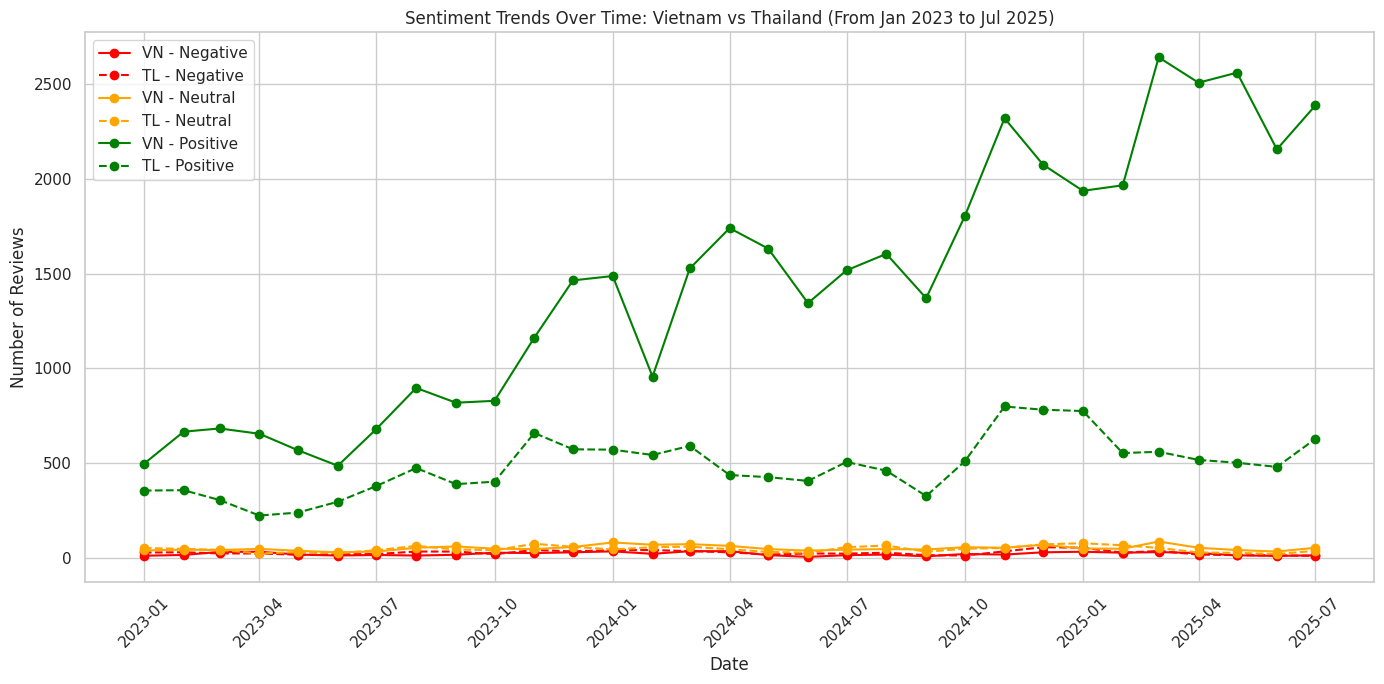

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))

sentiment_colors = {'Negative': 'red', 'Neutral': 'orange', 'Positive': 'green'}

for sentiment in ['Negative', 'Neutral', 'Positive']:
    for location in ['VN', 'TL']:
        df_plot = df_sentiment_pivot[(df_sentiment_pivot['Location'] == location)]
        linestyle = '-' if location == 'VN' else '--'  # Use solid line for VN, dotted for TL
        ax.plot(df_plot['date'], df_plot[sentiment], color=sentiment_colors[sentiment], label=f'{location} - {sentiment}', marker='o', linestyle=linestyle)

ax.set_xlabel("Date")
ax.set_ylabel("Number of Reviews")
ax.set_title("Sentiment Trends Over Time: Vietnam vs Thailand (From Jan 2023 to Jul 2025)")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_overtime.jpg', dpi = 300, bbox_inches='tight')
plt.show()

**Positive vs Negative**

In [ ]:
rating_count_vn = df_vn_sen['rating'].value_counts()
rating_percent_vn = df_vn_sen['rating'].value_counts(normalize=True) * 100
rating_vn = pd.DataFrame({
    'rating': rating_count_vn.index,
    'count': rating_count_vn.values,
    'percentage': rating_percent_vn.values
})

rating_vn

,rating,count,percentage
0,5.0,43119,91.571101
1,4.0,2491,5.290095
2,3.0,765,1.624618
3,1.0,391,0.830360
4,2.0,322,0.683826


In [ ]:
rating_count_hanoi = df_hanoi_sen['rating'].value_counts()
rating_percent_hanoi = df_hanoi_sen['rating'].value_counts(normalize=True) * 100
rating_hanoi = pd.DataFrame({
    'rating': rating_count_hanoi.index,
    'count': rating_count_hanoi.values,
    'percentage': rating_percent_hanoi.values
})

rating_hanoi

,rating,count,percentage
0,5.0,31172,93.293030
1,4.0,1516,4.537156
2,3.0,410,1.227067
3,1.0,173,0.517763
4,2.0,142,0.424984


In [ ]:
rating_count_danang = df_danang_sen['rating'].value_counts()
rating_percent_danang = df_danang_sen['rating'].value_counts(normalize=True) * 100
rating_danang = pd.DataFrame({
    'rating': rating_count_danang.index,
    'count': rating_count_danang.values,
    'percentage': rating_percent_danang.values
})

rating_danang

,rating,count,percentage
0,5,11947,87.363803
1,4,975,7.129799
2,3,355,2.595978
3,1,218,1.594150
4,2,180,1.316271


In [ ]:
rating_count_tl = df_tl_sen['rating'].value_counts()
rating_percent_tl = df_tl_sen['rating'].value_counts(normalize=True) * 100
rating_tl = pd.DataFrame({
    'rating': rating_count_tl.index,
    'count': rating_count_tl.values,
    'percentage': rating_percent_tl.values
})

rating_tl

,rating,count,percentage
0,5,12928,75.158421
1,4,2366,13.755014
2,3,856,4.976455
3,1,631,3.668391
4,2,420,2.441719


In [ ]:
rating_count_bangkok = df_bangkok_sen['rating'].value_counts()
rating_percent_bangkok = df_bangkok_sen['rating'].value_counts(normalize=True) * 100
rating_bangkok = pd.DataFrame({
    'rating': rating_count_bangkok.index,
    'count': rating_count_bangkok.values,
    'percentage': rating_percent_bangkok.values
})

rating_bangkok

,rating,count,percentage
0,5,11294,75.987351
1,4,2053,13.812824
2,3,701,4.716410
3,1,477,3.209312
4,2,338,2.274103


In [ ]:
rating_count_pattaya = df_pattaya_sen['rating'].value_counts()
rating_percent_pattaya = df_pattaya_sen['rating'].value_counts(normalize=True) * 100
rating_pattaya = pd.DataFrame({
    'rating': rating_count_pattaya.index,
    'count': rating_count_pattaya.values,
    'percentage': rating_percent_pattaya.values
})

rating_pattaya

,rating,count,percentage
0,5,1634,69.888794
1,4,313,13.387511
2,3,155,6.629598
3,1,154,6.586826
4,2,82,3.507271


In [ ]:
df_vn_pos = df_vn_sen[df_vn_sen['rating'] == 5].reset_index(drop=True)
df_vn_nn = df_vn_sen[df_vn_sen['rating'].isin([1, 2, 3, 4])].reset_index(drop=True)

**Emotions**

In [64]:
# Load NRC Emotion Lexicon
nrc = {}
with open("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", "r") as f:
    for line in f:
        word, emotion, association = line.strip().split('\t')
        if int(association) == 1:
            nrc.setdefault(word, []).append(emotion)

In [66]:
#NLP clean function

def tokenize_text(text):
    return word_tokenize(text)

Thailand

In [62]:
df_bangkok_emo = pd.read_csv('clean_bangkok.csv')
df_pattaya_emo = pd.read_csv('clean_pattaya.csv')

df_thai = pd.concat([df_bangkok_emo, df_pattaya_emo], ignore_index=True)

In [71]:
df_thai['tokens'] = df_thai['content'].apply(tokenize_text)

In [72]:
def get_emotions(token):
    emotion_counter = Counter()
    for token in token:
        if token in nrc:
            for emotion in nrc[token]:
                emotion_counter[emotion] += 1
    return emotion_counter

df_thai['emotion_counts'] = df_thai['tokens'].apply(get_emotions)

In [74]:
emo_thai = df_thai['emotion_counts'].apply(lambda x: pd.Series(x))
emo_thai = emo_thai.fillna(0).astype(int)
df_emo_thai = pd.concat([df_thai, emo_thai], axis=1)
df_emo_thai

,rating,date,travel_type,location,content,processed_text,emotion_counts,tokens,positive,trust,anticipation,joy,surprise,sadness,negative,disgust,fear,anger
0,5,2025-07,Couples,NaN,Great tour Anna was a great tour guide. Alot o...,great tour anna great tour guide alot fun saw ...,"{'positive': 4, 'trust': 2, 'anticipation': 2,...","[Great, tour, Anna, was, a, great, tour, guide...",4,2,2,2,0,0,0,0,0,0
1,5,2025-07,Family,NaN,"Boat tour Excellent excursion, very fun. Ken, ...",boat tour excellent excursion fun ken attentiv...,"{'anticipation': 4, 'joy': 4, 'positive': 6, '...","[Boat, tour, Excellent, excursion, ,, very, fu...",6,4,4,4,0,0,0,0,0,0
2,5,2025-07,Family,NaN,Thon buri canal trip Great insight into Thon B...,thon buri canal trip great insight thon buri c...,"{'surprise': 2, 'positive': 2, 'trust': 2, 'an...","[Thon, buri, canal, trip, Great, insight, into...",2,2,1,1,2,1,0,0,0,0
3,5,2025-07,Friends,NaN,"Great Tour Great guide, showed us lots of inte...",great tour great guide showed u lot interestin...,"{'positive': 2, 'trust': 1}","[Great, Tour, Great, guide, ,, showed, us, lot...",2,1,0,0,0,0,0,0,0,0
4,5,2025-07,Solo,NaN,Must do. It was a great experience. I would de...,must great experience would definitely guide f...,"{'positive': 2, 'trust': 2, 'anticipation': 1,...","[Must, do, ., It, was, a, great, experience, ....",2,2,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16847,5,2023-01,Family,Australia,Great day out Well run water park from start t...,great day well run water park start finish wen...,"{'anticipation': 1, 'positive': 6, 'sadness': ...","[Great, day, out, Well, run, water, park, from...",6,3,1,1,0,1,0,0,0,0
16848,5,2023-01,Friends,Canada,Awesome beach The beach goes on for ever - res...,awesome beach beach go ever restaurant bar lun...,{'joy': 2},"[Awesome, beach, The, beach, goes, on, for, ev...",0,0,0,2,0,0,0,0,0,0
16849,4,2023-01,Friends,UK,Rainbow Beach 25 must go .. Look out for Rainb...,rainbow beach must go look rainbow beach jomti...,"{'joy': 6, 'anticipation': 2, 'positive': 4, '...","[Rainbow, Beach, 25, must, go, .., Look, out, ...",4,3,2,6,0,0,0,0,0,0
16850,3,2023-01,NaN,Denmark,Beautiful building - but do not come for the a...,beautiful building come animal rowing boat san...,"{'positive': 20, 'anticipation': 9, 'joy': 10,...","[Beautiful, building, -, but, do, not, come, f...",20,10,9,10,2,1,4,0,1,1


In [76]:
emotion_totals = emo_thai.sum().sort_values(ascending=False)
print(emotion_totals)

positive        80157
trust           46500
joy             39016
anticipation    31994
surprise        17057
negative        13272
sadness          6722
fear             6368
anger            6004
disgust          3769
dtype: int64


In [77]:
emotion_averages = emo_thai.mean().sort_values(ascending=False)
print(emotion_averages)

positive        4.756527
trust           2.759316
joy             2.315215
anticipation    1.898528
surprise        1.012165
negative        0.787562
sadness         0.398884
fear            0.377878
anger           0.356278
disgust         0.223653
dtype: float64


In [82]:
emotion_by_country = df_emo_thai.groupby('location')[emo_thai.columns].mean()

# Calculate the sum of all emotion averages for each country
emotion_by_country['total_average'] = emotion_by_country.sum(axis=1)

# Sort by total average and get the top 20
top_10_emotion_by_country = emotion_by_country.sort_values(by='total_average', ascending=False).head(10)

top_10_emotion_by_country

,positive,trust,anticipation,joy,surprise,sadness,negative,disgust,fear,anger,total_average
location,,,,,,,,,,,
USA,22.000000,9.0,13.0,10.000000,4.000000,3.000000,4.000000,1.000000,1.0,2.000000,69.000000
Scotland,14.000000,11.0,7.0,10.000000,4.000000,3.000000,3.000000,3.000000,3.0,3.000000,61.000000
WY,16.500000,10.0,5.5,3.500000,1.500000,2.000000,6.000000,0.500000,2.0,4.000000,51.500000
Deutschland,15.500000,8.0,6.0,4.500000,3.000000,1.500000,5.000000,0.000000,3.0,4.000000,50.500000
Costa Rica,17.000000,10.0,5.5,9.000000,1.500000,1.000000,2.000000,0.500000,0.0,1.000000,47.500000
Jordan,12.600000,6.8,5.6,7.800000,3.000000,0.800000,1.800000,0.200000,0.8,0.200000,39.600000
East Sussex,12.000000,7.0,6.0,6.000000,2.000000,0.000000,2.000000,0.000000,2.0,2.000000,39.000000
Illinois,12.500000,9.0,4.0,5.000000,1.500000,0.000000,2.500000,0.000000,0.5,2.500000,37.500000
Iceland,10.333333,6.0,4.0,4.666667,3.333333,1.666667,2.666667,0.333333,2.0,1.666667,36.666667


In [103]:
emotion_by_rating_thai = df_emo_thai.groupby('rating')[emo_thai.columns].mean()

# Calculate the sum of all emotion averages for each travel type
emotion_by_rating_thai['total_average'] = emotion_by_rating_thai.sum(axis=1)

# Sort by total average
emotion_by_rating_thai = emotion_by_rating_thai.sort_values(by='total_average', ascending=False)

emotion_by_rating_thai

,positive,trust,anticipation,joy,surprise,sadness,negative,disgust,fear,anger,total_average
rating,,,,,,,,,,,
1,4.306947,2.618740,2.153473,1.927302,1.059774,1.594507,3.226171,1.424879,1.413570,1.504039,21.229402
2,4.393035,2.385572,2.072139,1.850746,0.957711,1.012438,2.231343,0.833333,0.853234,1.062189,17.651741
3,4.588020,2.518337,2.124694,2.091687,1.059902,0.831296,1.636919,0.497555,0.754279,0.720049,16.822738
4,4.540789,2.423684,2.042105,2.163596,1.085526,0.475439,0.977632,0.236842,0.470175,0.441667,14.857456
5,4.839315,2.853530,1.840415,2.390246,0.995366,0.279903,0.534831,0.126050,0.271813,0.239535,14.371004


VN

In [88]:
df_hanoi_emo = pd.read_csv('clean_hanoi.csv')
df_danang_emo = pd.read_csv('clean_danang.csv')

df_viet = pd.concat([df_hanoi_emo, df_danang_emo], ignore_index=True)

In [89]:
df_viet['tokens'] = df_viet['content'].apply(tokenize_text)

In [90]:
def get_emotions(token):
    emotion_counter = Counter()
    for token in token:
        if token in nrc:
            for emotion in nrc[token]:
                emotion_counter[emotion] += 1
    return emotion_counter

df_viet['emotion_counts'] = df_viet['tokens'].apply(get_emotions)

In [102]:
emo_viet = df_viet['emotion_counts'].apply(lambda x: pd.Series(x))
emo_viet = emo_viet.fillna(0).astype(int)
df_emo_viet = pd.concat([df_viet, emo_viet], axis=1)

In [92]:
emotion_totals = emo_viet.sum().sort_values(ascending=False)
print(emotion_totals)

positive        239457
trust           147086
joy             129850
anticipation     90834
surprise         52237
negative         25635
sadness          14359
fear             11709
anger            10005
disgust           5795
dtype: int64


In [93]:
emotion_averages = emo_viet.mean().sort_values(ascending=False)
print(emotion_averages)

positive        4.811175
trust           2.955255
joy             2.608949
anticipation    1.825039
surprise        1.049547
negative        0.515059
sadness         0.288501
fear            0.235257
anger           0.201021
disgust         0.116433
dtype: float64
